## Projekt Crowdfunding

### Basics

In [1]:
# import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [6]:
# multiple download
import requests
import re
import os

# example links
# https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2023-05-18T03_20_08_715Z.zip
# https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter_2023-04-18T13_03_17_223Z.zip

base_url="https://s3.amazonaws.com/weruns/forfun/Kickstarter/Kickstarter"
base_path="C:/Users/Franz.000/Documents/GitHub/MAY23_BDA_INT_Crowdfunding/data/kick/"

# build function for download of files
# cf https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url
def download_url(url,save,chunk_size=128):
    r=requests.get(url,stream=True)
#   sth like: 
#   if r.isnull: continue
    print("downloading file from",url)
    with open(save,'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)
                
for year in range(2016,2023):
    for month in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
        if (year==2016) & ((month=="01")|(month=="02")): continue
        url=base_url+"_"+str(year)+"-"+month+str(re.group(f"{base_url}/{year}-{month}\
            -[0-9][0-9][A-Z][0-9][0-9]_[0-9][0-9]_[0-9][0-9][0-9][A-Z]\.zip$"))
        save=f"{base_path}/{year}/{month}"
        os.makedirs(save)

#       JSON files? -> gzip
                
        # download
        download_file(url,save)


AttributeError: module 're' has no attribute 'group'

In [2]:
# Unklar inwieweit die Daten aufgebaut sind, Sie scheinen sich nicht zu addieren
imp=r'C:\Users\bosse\Desktop\Notebooks\Data\Project\Webrobots_may_2023.csv'
imp=r'C:\Users\Franz.000\Documents\Berufliches\Weiterbildung\data analyst\data\kickstarter\2023_05\Kickstarter_2023-05-18T03_20_08_715Z\Kickstarter.csv'
# April: imp=r'C:\Users\Franz.000\Documents\Berufliches\Weiterbildung\data analyst\data\kickstarter\2023_04\Kickstarter_2023-04-18T13_03_17_223Z\Kickstarter.csv'
df_imp=pd.read_csv(imp)
df=df_imp
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,58,"A portable parabolic microphone, designed to l...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",9999.0,ES,Spain,1682610083,"{""id"":1966732519,""name"":""Birdfox"",""slug"":""bird...",EUR,€,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1684249091,1.085950,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,9992.908771,international
1,5,Wirelessly control your Eurorack with your ent...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",951.0,US,the United States,1678992193,"{""id"":1627984486,""name"":""Wray Bowling"",""slug"":...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1683967366,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,951.000000,international
2,167,Active Noise Cancelling | Hearing Protection M...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",21747.0,US,the United States,1679591475,"{""id"":991035804,""name"":""ADV.SOUND"",""slug"":""adv...",USD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1683646208,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,21747.000000,international
3,14,Acoustic Instruments for Pre-Talkers (Ages 1+),"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",839.0,CA,Canada,1662465447,"{""id"":679633310,""name"":""Treble-Starter"",""slug""...",CAD,$,...,https://www.kickstarter.com/discover/categorie...,False,False,live,1682965969,0.732306,"{""web"":{""project"":""https://www.kickstarter.com...",0.742165,828.450070,international
4,33,And the last DJ mixer you will ever need.,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",47160.0,DE,Germany,1677510353,"{""id"":1392006048,""name"":""Menura Audio"",""slug"":...",EUR,€,...,https://www.kickstarter.com/discover/categorie...,False,True,live,1682960408,1.112751,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,48294.487055,international


### Exploration

In [4]:
# duplicates
# Are there completely duplicated rows?
print(df.duplicated().sum()==0)

# Are there duplicated rows with respect to subset(s) of columns?
# print(df.duplicated(subset=["",""]).sum()==0)

True


In [3]:
# Distribution of missing values
df.info()
print(round(df.isna().mean()*100,2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3651 entries, 0 to 3650
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   backers_count             3651 non-null   int64  
 1   blurb                     3651 non-null   object 
 2   category                  3651 non-null   object 
 3   converted_pledged_amount  3597 non-null   float64
 4   country                   3651 non-null   object 
 5   country_displayable_name  3651 non-null   object 
 6   created_at                3651 non-null   int64  
 7   creator                   3651 non-null   object 
 8   currency                  3651 non-null   object 
 9   currency_symbol           3651 non-null   object 
 10  currency_trailing_code    3651 non-null   bool   
 11  current_currency          3651 non-null   object 
 12  deadline                  3651 non-null   int64  
 13  disable_communication     3651 non-null   bool   
 14  fx_rate 

In [8]:
# general distribution of variables
display(df.describe())
desc2=df.describe(exclude="number").T
display(desc2)

# categorical variables
# function
def di_cat_vars(df,limit):
    """
    This function returns all columns of a data frame 'df' and the respective 
    number of unique values and these values if the values don't reach a certain minimum ('limit') 
    of unique values. That limit is to be given as argument by the user.
    """
    import pandas as pd
    for col in df.columns:
        n_unique=df[col].nunique()
        values=df[col].unique().tolist()
        if n_unique<limit:
            print(col,": ",n_unique,":\n",values)
            
di_cat_vars(df,10)

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_exchange_rate,usd_pledged
count,3651.000000,3.597000e+03,3.651000e+03,3.651000e+03,3651.000000,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3.651000e+03,3651.000000,3597.000000,3.597000e+03
mean,265.113667,2.758684e+04,1.552888e+09,1.542761e+09,0.941663,4.159864e+04,1.077135e+09,1.533609e+09,7.223546e+04,1.560438e+09,0.941867,0.955201,2.760089e+04
std,993.503739,1.221460e+05,8.991469e+07,1.852778e+08,0.269395,8.355389e+05,6.217226e+08,2.079220e+08,1.111298e+06,8.931175e+07,0.302508,0.281305,1.221365e+05
min,0.000000,0.000000e+00,1.252007e+09,0.000000e+00,0.007328,0.000000e+00,4.596310e+05,0.000000e+00,0.000000e+00,1.260598e+09,0.000000,0.006782,0.000000e+00
25%,9.000000,4.260000e+02,1.477760e+09,1.481054e+09,1.000000,1.675000e+03,5.177459e+08,1.476708e+09,4.340000e+02,1.485552e+09,1.000000,1.000000,4.230000e+02
50%,46.000000,3.230000e+03,1.564055e+09,1.568444e+09,1.000000,5.000000e+03,1.100281e+09,1.565028e+09,3.382000e+03,1.570853e+09,1.000000,1.000000,3.235000e+03
75%,175.000000,1.608700e+04,1.630406e+09,1.636797e+09,1.000000,1.500000e+04,1.611495e+09,1.633180e+09,1.822100e+04,1.638302e+09,1.000000,1.000000,1.608700e+04
max,31720.000000,2.804475e+06,1.684176e+09,1.689538e+09,1.248223,4.900000e+07,2.147283e+09,1.684371e+09,6.100265e+07,1.684371e+09,1.715913,1.712819,2.804475e+06


,count,unique,top,freq
blurb,3651,3612,Castle Elysium is the Sanctuary for two twin S...,6
category,3651,16,"{""id"":253,""name"":""Webcomics"",""analytics_name"":...",1367
country,3651,24,US,2388
country_displayable_name,3651,24,the United States,2388
creator,3651,3637,"{""id"":1078496550,""name"":""Independent Publishin...",3
currency,3651,15,USD,2388
currency_symbol,3651,7,$,2875
currency_trailing_code,3651,2,True,2917
current_currency,3651,1,USD,3651
disable_communication,3651,1,False,3651


currency_symbol :  7 :
 ['€', '$', 'Fr ', '¥', '£', 'kr', 'zł']
currency_trailing_code :  2 :
 [False, True]
current_currency :  1 :
 ['USD']
disable_communication :  1 :
 [False]
is_starrable :  2 :
 [True, False]
spotlight :  2 :
 [False, True]
staff_pick :  2 :
 [False, True]
state :  6 :
 ['live', 'submitted', 'successful', 'started', 'failed', 'canceled']
usd_type :  2 :
 ['international', 'domestic']


In [9]:
# exctract category
#categ.to_csv(r"C:\Users\Franz.000\Documents\Berufliches\Weiterbildung\data analyst\data\kickstarter\2023_05")
df["category"]=df["category"].apply(lambda x:x.split(':')[3])
df["category"]=df["category"].apply(lambda x:x.split('","')[0])
df["category"]=df["category"].apply(lambda x:x.split('"')[1])
df["category"].value_counts()
#display(df)
#import json
# file=r"C:\Users\Franz.000\Documents\Berufliches\Weiterbildung\data analyst\data\kickstarter\2023_05\Kickstarter_2023-05-18T03_20_08_715Z.json\Kickstarter_2023-05-18T03_20_08_715Z.json"
# with open(file) as user_file:
#   dfjson=json.load(user_file)
# # dfjson=jload("C:\Users\Franz.000\Documents\Berufliches\Weiterbildung\data analyst\data\kickstarter\2023_05\Kickstarter_2023-05-18T03_20_08_715Z.json\Kickstarter_2023-05-18T03_20_08_715Z.json")
# dfjson.head()

Webcomics             1367
Sound                  492
Comedy                 396
R&B                    300
Literary Spaces        249
Photo                  235
Product Design         206
Spaces                 132
Cookbooks               96
Literary Journals       72
Audio                   60
Toys                    24
Design                   6
Graphic Design           6
Interactive Design       6
Architecture             4
Name: category, dtype: int64

In [ ]:
# get state dummies


In [10]:
# convert date variables
import datetime
df['created_at'].value_counts()
df['created_at']=pd.to_datetime(df['created_at'],unit='s')
df['state_changed_at']=pd.to_datetime(df['state_changed_at'],unit='s')
df['deadline']=pd.to_datetime(df['deadline'],unit='s')
df['launched_at']=pd.to_datetime(df['launched_at'],unit='s')
def get_year(x):
    return x.year
df['launched_year']=df['launched_at'].apply(get_year)

### Businesscases und Datavisualization

In [127]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,duration,created_year,launched_year
0,58,"A portable parabolic microphone, designed to l...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",9999.0,ES,Spain,2023-04-27 15:41:23,"{""id"":1966732519,""name"":""Birdfox"",""slug"":""bird...",EUR,€,...,live,2023-05-16 14:58:11,1.085950,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,9992.908771,international,30 days 00:00:00,2023,2023
1,5,Wirelessly control your Eurorack with your ent...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",951.0,US,the United States,2023-03-16 18:43:13,"{""id"":1627984486,""name"":""Wray Bowling"",""slug"":...",USD,$,...,live,2023-05-13 08:42:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,951.000000,international,60 days 00:00:00,2023,2023
2,167,Active Noise Cancelling | Hearing Protection M...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",21747.0,US,the United States,2023-03-23 17:11:15,"{""id"":991035804,""name"":""ADV.SOUND"",""slug"":""adv...",USD,$,...,live,2023-05-09 15:30:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,21747.000000,international,30 days 00:00:00,2023,2023
3,14,Acoustic Instruments for Pre-Talkers (Ages 1+),"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",839.0,CA,Canada,2022-09-06 11:57:27,"{""id"":679633310,""name"":""Treble-Starter"",""slug""...",CAD,$,...,live,2023-05-01 18:32:49,0.732306,"{""web"":{""project"":""https://www.kickstarter.com...",0.742165,828.450070,international,41 days 09:26:14,2022,2023
4,33,And the last DJ mixer you will ever need.,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",47160.0,DE,Germany,2023-02-27 15:05:53,"{""id"":1392006048,""name"":""Menura Audio"",""slug"":...",EUR,€,...,live,2023-05-01 17:00:08,1.112751,"{""web"":{""project"":""https://www.kickstarter.com...",1.086631,48294.487055,international,31 days 00:00:00,2023,2023


#### 1 Backer Strategy

Is it better to rely on a huge number of backers or is it possible to achieve high funding with less backers?
Is there a correlation between the number of backers and the amount of funding?

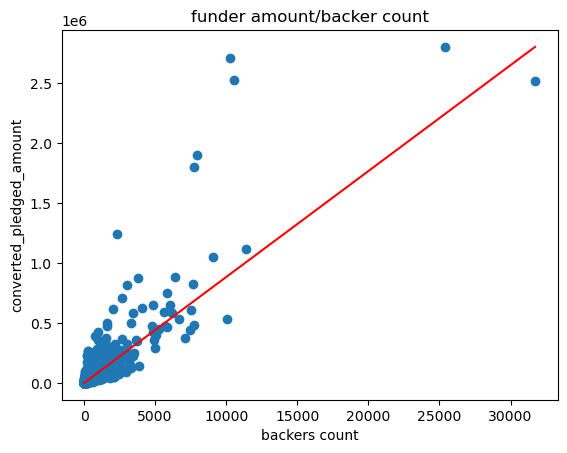

In [15]:
# Visualization
plt.scatter(df['backers_count'],df['converted_pledged_amount'])
plt.plot((df["backers_count"].min(),df["backers_count"].max()),(df["converted_pledged_amount"].min(),\
                                                                df["converted_pledged_amount"].max()),"red")
plt.xlabel('backers count')
plt.ylabel('converted_pledged_amount')
plt.title('funder amount/backer count');

In [6]:
df['converted_pledged_amount'].fillna(df['converted_pledged_amount'].median(),inplace=True)
p_corr=stats.pearsonr(df['backers_count'],df['converted_pledged_amount'])
print('With a statistical value of',p_corr[0], 'and a p value of',p_corr[1],'we can say that these two variables are closely correlated.')
print('There are notable examples of projects receiving high funding despite relatively low backers numbers.')

with a statistical value of 0.862598983025971 and a p value of 0.0 we can say that these two variables are closely correlated
There are notable examples of projects receiving high funding despite relatively low backer numbers


####  2 US Bias

Is it better to be based in the US?

In [184]:
display(df['country'].value_counts())
print('The US hosts by far the most projects.')

US    2388
GB     361
CA     198
MX     105
HK      84
AU      82
IT      69
DE      67
FR      64
ES      48
JP      38
SE      28
NL      22
IE      20
DK      17
CH      15
SG      11
BE      10
NZ       7
AT       5
PL       4
LU       4
SI       2
NO       2
Name: country, dtype: int64

The US hosts by far the most projects.


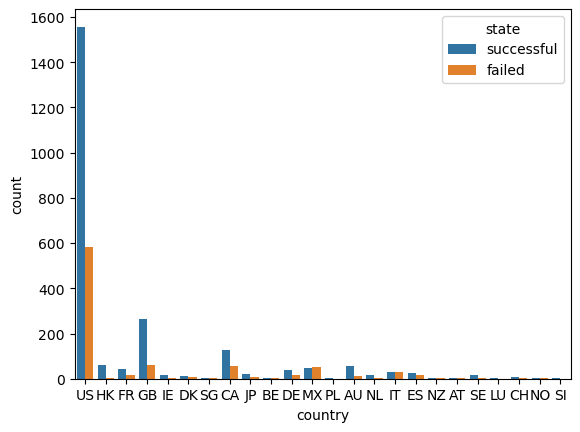

In [19]:
# we will only use inactive Projects for this analysis, projects need a state of either failed or successful
df_2=df[df['state'].isin(['successful','failed'])]
sns.countplot(x=df_2['country'],hue=df_2['state']);

We see multiple high rates combined with very small number of projects, to resolve this, only countries with more than 10 projects are included in the following analysis.

In [129]:
# Building of a DataFrame containing the successrate for different countries
add_country=[]
add_state=[]
for item in df_2['country'].unique().tolist():
    if len(df_2[(df_2['country']==item)])>10:
        rate=len(df_2[(df_2['country']==item) & (df_2['state']=='successful')])/len(df_2[(df_2['country']==item)])
        add_country.append(item)
        add_state.append(rate)
dic=({'country':add_country,'Sucessful Projects in %':add_state})
df_dic=pd.DataFrame(dic).sort_values(by='Sucessful Projects in %',ascending=False)
df_dic["rank"]=range(len(df_dic))
df_dic["rank"]=df_dic["rank"]+1
df_dic

,country,Sucessful Projects in %,rank
1,HK,0.951613,1
4,IE,0.842105,2
11,NL,0.833333,3
3,GB,0.816199,4
10,AU,0.800000,5
14,SE,0.782609,6
7,JP,0.760000,7
2,FR,0.732143,8
0,US,0.728251,9
8,DE,0.698113,10


Now we can see, that the US are not in the pole position anymore. Other countries (in part way smaller) like Hong Kong, Ireland, and the Netherlands rank higher in the share of successful projects *relative* to the total amount of project campaigns run on Kickstarter.

The average successrate is 0.7251187499969183 which is nearly exact the number of the us with 0.7282507015902713


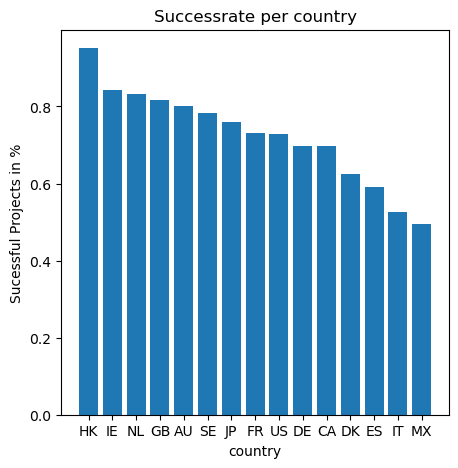

In [130]:
# Visualization and results
fig=plt.figure(figsize=(5,5))
plt.bar(df_dic['country'],df_dic['Sucessful Projects in %'].sort_values(ascending=False))
plt.xlabel('country')
plt.ylabel('Sucessful Projects in %')
plt.title('Successrate per country');
print('The average successrate is',df_dic['Sucessful Projects in %'].mean(),'which is nearly exact the number of the us with',df_dic['Sucessful Projects in %'][0])

It doesnt appear, a US Base is an important factor in the successrate of a Project. In general, three of the (commonly known as) most important world economies (Japan, USA, Germany) only score aorund the average.

#### 3 Currency USD

In [131]:
df_2['currency'].value_counts()

USD    2138
GBP     321
EUR     273
CAD     181
MXN      99
AUD      70
HKD      62
JPY      25
SEK      23
DKK      13
CHF       9
NZD       7
SGD       5
NOK       2
Name: currency, dtype: int64

In [132]:
df_2.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,duration,created_year,launched_year
14,29,A self-oscillating fuzz and distortion guitar ...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",4771.0,US,the United States,2022-09-15 17:33:38,"{""id"":1724395079,""name"":""David Ross Musical In...",USD,$,...,successful,2023-05-13 15:58:55,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,4.771000e+03,international,24 days 00:00:00,2022,2023
15,25,Auto Busylight | Strong ENC | Dual Microphone ...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",10939.0,HK,Hong Kong,2022-12-09 08:24:57,"{""id"":305441902,""name"":""Blucalm"",""is_registere...",HKD,$,...,successful,2023-05-13 11:02:13,0.127389,"{""web"":{""project"":""https://www.kickstarter.com...",0.127423,1.093669e+04,international,30 days 00:00:00,2022,2023
16,350,A Personal Assistant in Your Ears (Powered by ...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",82740.0,HK,Hong Kong,2023-03-23 13:13:30,"{""id"":247486855,""name"":""iKKO Audio"",""slug"":""ik...",HKD,$,...,successful,2023-05-01 15:40:36,0.127396,"{""web"":{""project"":""https://www.kickstarter.com...",0.127389,8.274465e+04,international,30 days 00:00:00,2023,2023
17,2289,Inviting you into the magical world of self-ex...,"{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",1240290.0,US,the United States,2022-12-07 22:32:34,"{""id"":1806713387,""name"":""CHOMPI CLUB"",""slug"":""...",USD,$,...,successful,2023-05-17 14:59:29,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1.240290e+06,international,50 days 00:00:00,2022,2023
18,258,"A cool and intuitive way to Explore Sounds, Pl...","{""id"":339,""name"":""Sound"",""analytics_name"":""Sou...",35686.0,FR,France,2022-12-21 19:29:37,"{""id"":1837420867,""name"":""OVAOM"",""slug"":""ovaom""...",EUR,€,...,successful,2023-04-18 21:59:00,1.072999,"{""web"":{""project"":""https://www.kickstarter.com...",1.093570,3.501519e+04,international,35 days 10:56:46,2022,2023


In [133]:
# visualize duration
# time_d=df_2['deadline']-df_2['launched_at']

# for d,l in zip([df_2['deadline'].unique().tolist()],[df_2['launched_at'].unique().tolist()]):
#     df_2.loc[(df_2['deadline']==d) & (df_2['launched_at']==l),"duration"]=(d-l).total_seconds()

df_2["duration"]=0
for row in range(0,len(df_2)):
    df_2["duration"][row]=datetime.timedelta(df_2['deadline']-df_2['launched_at'])
    
# sns.catplot(x=df_2['duration'],hue=df_2['state'],kind="box");

C:\Users\Franz.000\AppData\Local\Temp\ipykernel_13472\2849656892.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["duration"]=0


TypeError: unsupported type for timedelta days component: Series

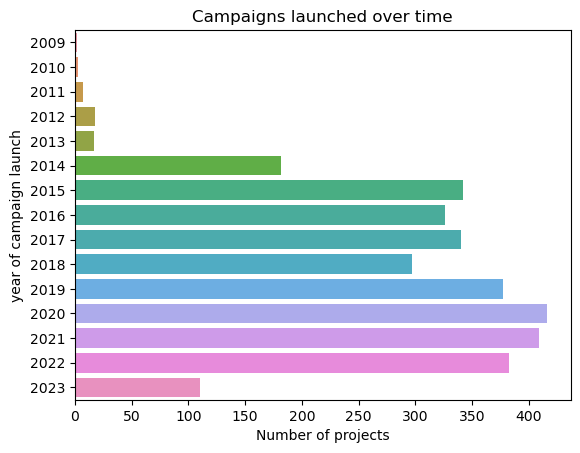

In [220]:
df_2.launched_year.value_counts()
#sns.displot(df.launched_year,bins=12); # -> outlier(s) before 2009
sns.countplot(y=df_2["launched_year"])
plt.ylabel('year of campaign launch')
plt.xlabel('Number of projects')
plt.title('Campaigns launched over time');
# sns.catplot(data=df,x="created_year");
# sns.relplot(y="created_year",hue="state",kind="line",data=df_2)
# sns.lineplot(df['created_year'],len(df['state'][(df['state']=='failed')]))

C:\Users\Franz.000\AppData\Local\Temp\ipykernel_8936\1683098282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["blurb_len"]=df_2.blurb.apply(len)


135    219
134    152
133    141
132    114
131    101
130     96
127     86
129     86
128     74
126     70
125     65
124     63
123     52
121     44
112     43
92      42
119     39
113     39
116     36
115     36
Name: blurb_len, dtype: int64
count    3228.000000
mean      103.606568
std        31.214177
min         2.000000
25%        83.000000
50%       115.000000
75%       130.000000
max       150.000000
Name: blurb_len, dtype: float64


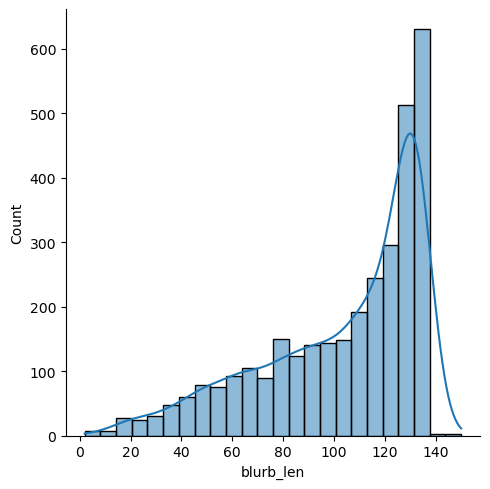

In [20]:
# length of blurb
df_2["blurb_len"]=df_2.blurb.apply(len)
print(df_2.blurb_len.value_counts()[:20])
#df_2["blurb_words"]=len(re.findall(r'\w+',df_2.blurb))
sns.displot(df_2.blurb_len,kde=True);
print(df_2.blurb_len.describe())

#sns.catplot (x = "pos" ,y = "stl", kind = "violin" ,data = df)

#df_2.head()

Of course, creators of kickstarter campaigns tend to write their project summaries (blurbs) not too long (with a maximum of 150 characters, which is fairly above the former twitter limit). In general, they seem to follow the recomendations of a short blurb. 

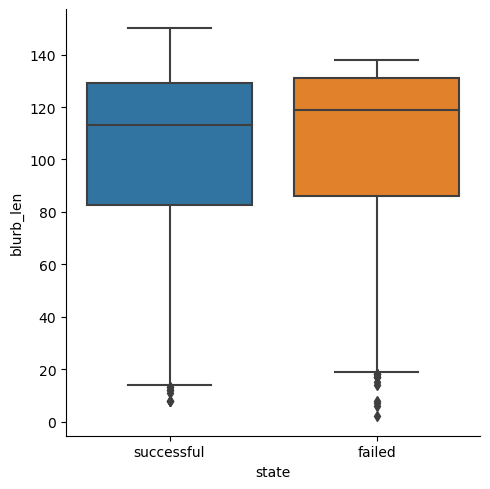

In [370]:
sns.catplot(y="blurb_len",x="state",kind="box",data=df_2);

Since, it's just the project summary (not the description possibly containing a lot more characters), the length of a campaigns blurb doesn't seem to affect its success. Successful projects have a wider range of blurb lengths, though. However, their median value is lower than for failed campaigns. Let's see, if the difference is significant.

In [21]:
import statsmodels.api
# df_2["state_successful"]=df_2["state"].replace(["successful","failed"],["1","0"]).astype(int)
df_2=pd.get_dummies(df_2,columns=["state"],drop_first=True)
print(pd.crosstab(df.state,df_2.state_successful))
# df_2.head()
result=statsmodels.formula.api.ols("state_successful ~ blurb_len",data=df_2).fit()
table=statsmodels.api.stats.anova_lm(result)
display(table)

state_successful    0     1
state                      
failed            876     0
successful          0  2352


,df,sum_sq,mean_sq,F,PR(>F)
blurb_len,1.0,0.233400,0.233400,1.180093,0.277418
Residual,3226.0,638.041693,0.197781,NaN,NaN


As the visual difference was small, already, the statistical test indicates, it's not significant: PR(>F) > 0.05. This is probably due to the fact, that - by the platform requirements and compared to a project's description - blurbs' length won't ever reach a high variety. Analyzing the length of descriptions (if availabe) might reveal interesting results.

In [166]:
# communication disabled
df_2.disable_communication.value_counts() # sad: All False -> can be dropped

False    3228
Name: disable_communication, dtype: int64

### Goal

"Money rules the world" is a common idiom - how about crowdfunding on kickstarter? Does the stated funding goal have influence on its success? In case of relatively low goals, potential backers might think, the creator will gather enough money ver easily and quickly, so they do not need to support the project.
What doe the data look like?

C:\Users\Franz.000\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Franz.000\AppData\Local\Temp\ipykernel_13472\3489364897.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2["goal_q"]=pd.qcut(df["goal"],labels=[0,1,2,3],q=4)


Text(0.5, 1.0, '4) Relationship of (reached/not reached) goals (cut into quartiles) and number of backers')

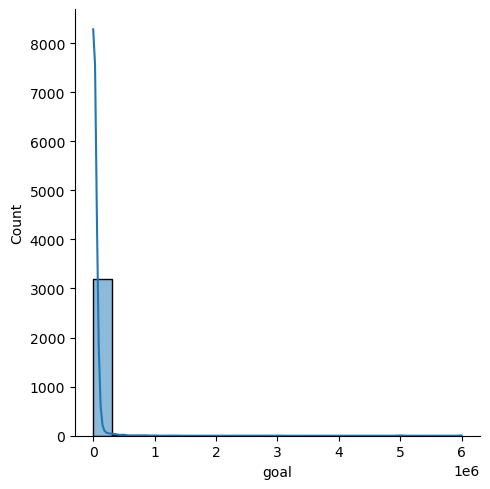

<Figure size 1500x700 with 0 Axes>

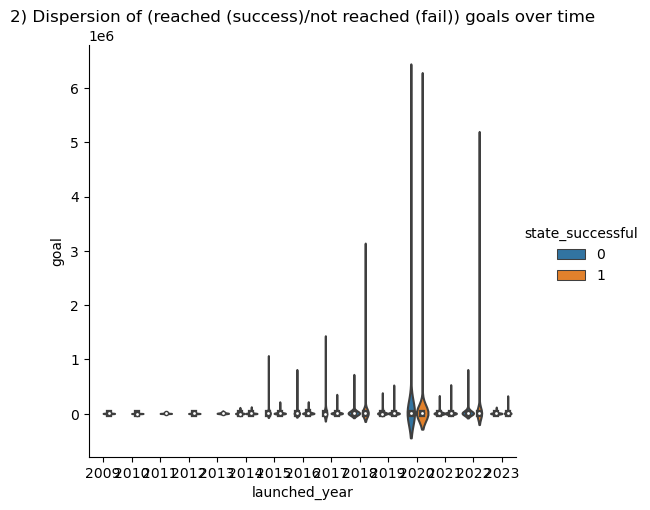

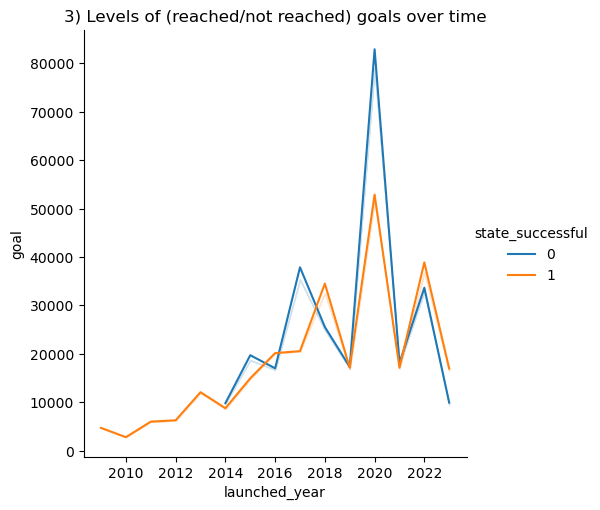

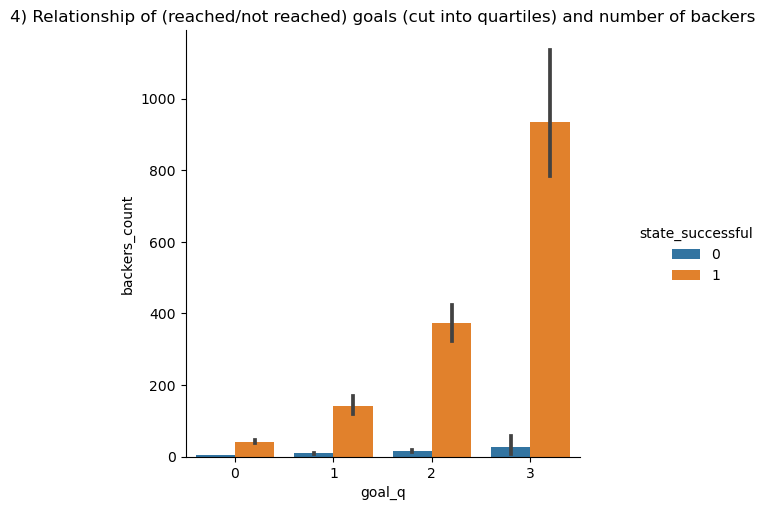

In [384]:
# goal
sns.displot(x="goal",data=df_2,bins=20,kde=True)
# plt.title('1) Distribution of funding goals');
#sns.catplot(y="goal",x="state_successful",kind="boxen",data=df_2) # more extreme values under successful projects
# sns.catplot(y="goal",x="state_successful",kind="violin",data=df_2);
fig=plt.figure(figsize=(15,7))
sns.catplot(y="goal",x="launched_year",hue="state_successful",kind="violin",data=df_2);
plt.title('2) Dispersion of (reached (success)/not reached (fail)) goals over time');
sns.relplot(y="goal",x="launched_year",hue="state_successful",kind="line",data=df_2,ci=False);
plt.title('3) Levels of (reached/not reached) goals over time');
# df_2["backers_count_q"]=pd.qcut(df["backers_count"],labels=[0,1,2,3],q=4)
df_2["goal_q"]=pd.qcut(df["goal"],labels=[0,1,2,3],q=4)
sns.catplot(x="goal_q",y="backers_count",hue="state_successful",kind="bar",data=df_2);
plt.title('4) Relationship of (reached/not reached) goals (cut into quartiles) and number of backers')

The Visualizations show clearly, 
(1) that the funding goals are far from following a normal distribution, 
(2, 3) there was something special about the year 2020 in the Kickstarter history of crowdfunding goals: The dispersion differs from all other years (being wider), and having more backers in general, and
(3) 2020 has been the year of the highest goals (of successful (1) and - especially - failed (0) campaigns). Overall, there seems to be a slight upward trend in the goals over time.
(4) Moreover (and as one would expect), successful campaigns seem to need more backers behind: the number of backers increases from the lowest to the last quartile of funding goals' amount (espeacially from the third to the fourth quartile), backers behind failed campaigns appear fairly stable over goal quartiles.
With the following ANOVA, we will check for the last two observations.

,df,sum_sq,mean_sq,F,PR(>F)
launched_year,1.0,1.392555e+11,1.392555e+11,3.144307,0.076287
Residual,3226.0,1.428736e+14,4.428814e+10,NaN,NaN


Spearman's r is     0.464 with a strong p-value of     0.000 .


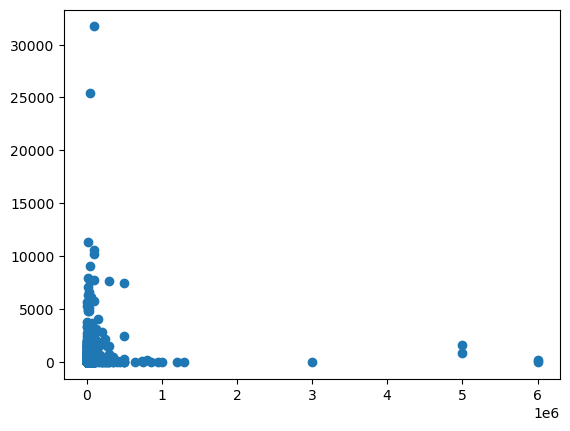

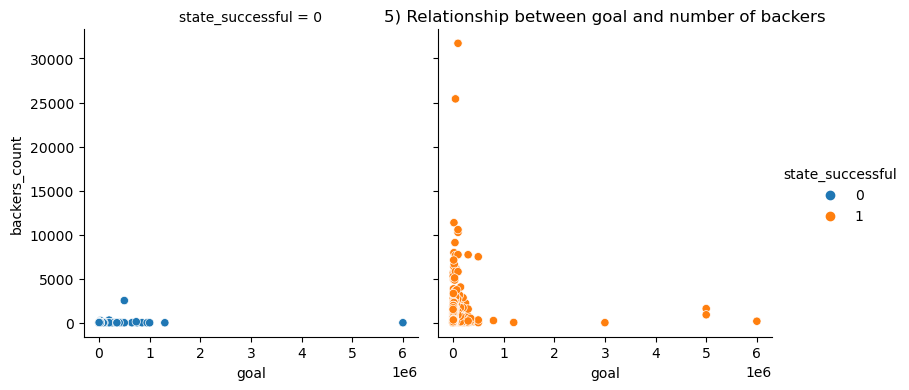

In [386]:
# significance test with ANOVA
result=statsmodels.formula.api.ols("goal ~ launched_year",data=df_2).fit()
table=statsmodels.api.stats.anova_lm(result)
display(table)

# correlation test Spearman's r
plt.scatter(df_2.goal,df_2.backers_count); # -> non-linear relationship requires Spearman's r
sns.relplot(x="goal",y="backers_count",col="state_successful",hue="state_successful",height=4,data=df_2);
plt.title("5) Relationship between goal and number of backers");

from scipy.stats import spearmanr
r=spearmanr(df_2.goal,df_2.backers_count)[0]
p=spearmanr(df_2.goal,df_2.backers_count)[1]
print("Spearman's r is",'% 9.3f' % r,"with a strong p-value of",'% 9.3f' % p,".")

The trend of increasing goals over time seen in the above graph (3) is not significant (or only on the 10& level), while the relationhsip between the goals value and the number of backers contributing to it, is indeed significant (on the 99& level), though not very strong. If there is a (significant) interaction between both affecting the success of campaigns needs to be analyzed in a multivariate model.

### Category

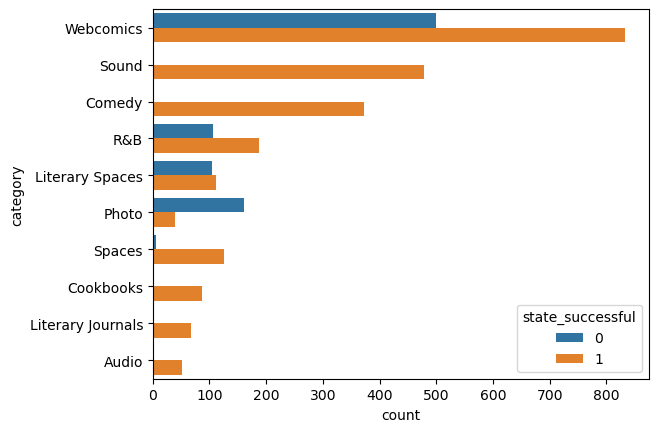

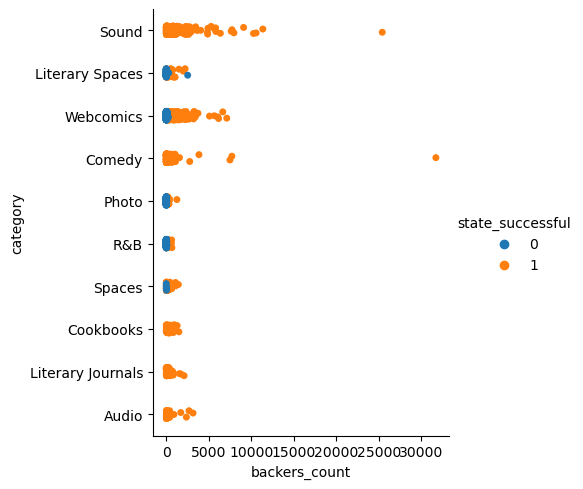

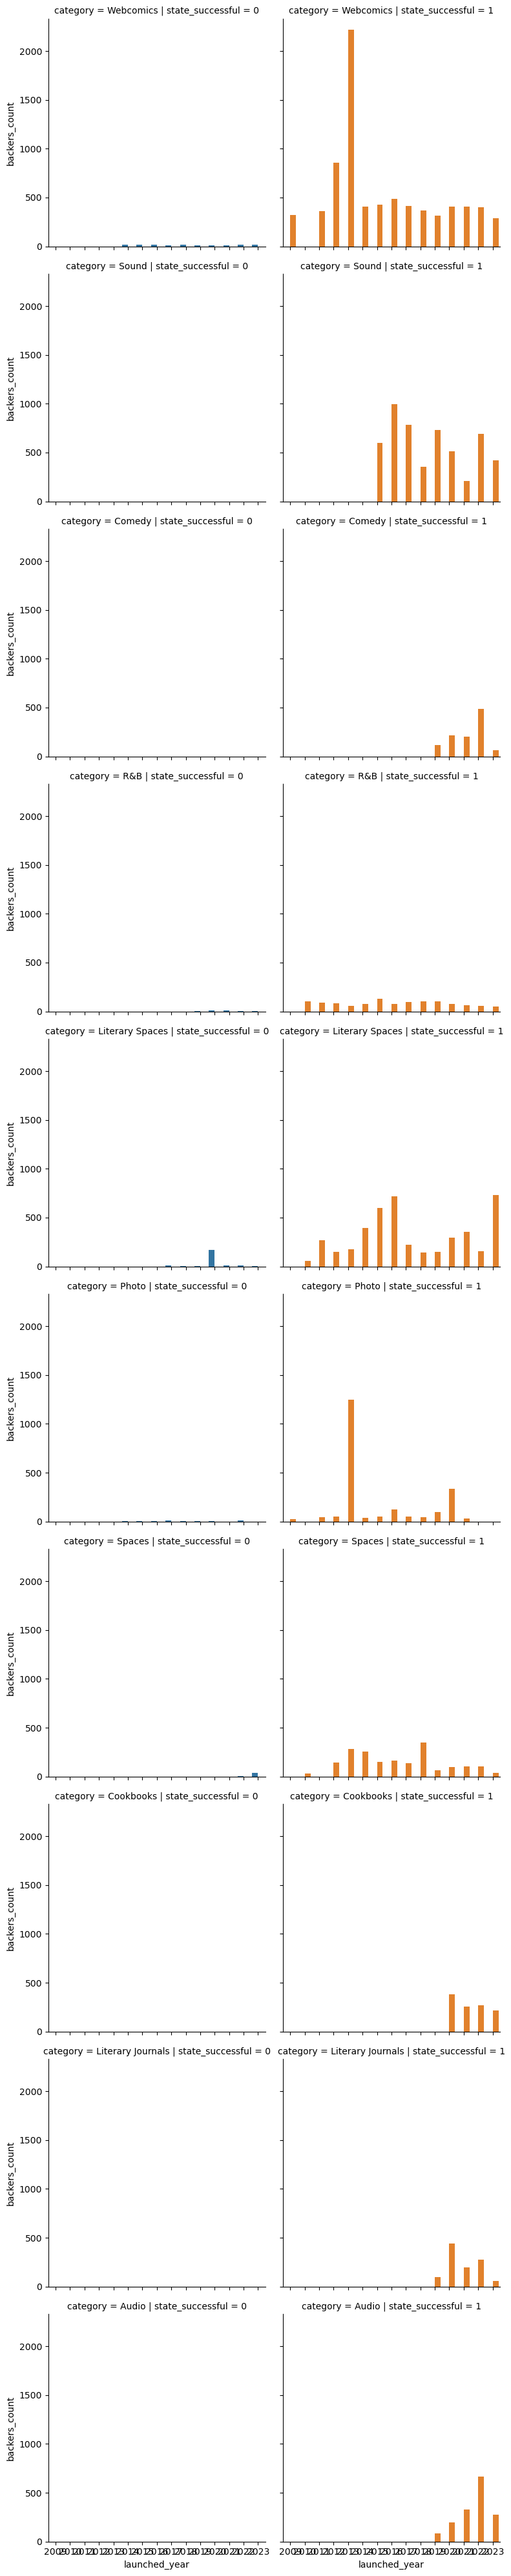

In [23]:
df_2.category.value_counts()
order=["Webcomics","Sound","Comedy","R&B","Literary Spaces","Photo","Spaces","Cookbooks","Literary Journals","Audio"]
sns.countplot(y="category",data=df_2,hue="state_successful",order=order);
sns.catplot(y="category",x="backers_count",hue="state_successful",data=df_2)
sns.catplot(x="launched_year",y="backers_count",hue="state_successful",row="category",\
            row_order=order,col="state_successful",kind="bar",errorbar=('ci',False),height=4,data=df_2);

# g=sns.FacetGrid(df_2,col="state",row='category')
# g.map(plt.scatter,"goal","backers_count",alpha=0.7)

The projects of the category "Webcomics" seem to be (by far) the most successful (in terms of the share of successful campaigns) and most attractive (according to their total number).
However, projects of the category "R&B" have a lot fewer projects, but with a similar ratio of success (1) vs. fail. "Photo" projects, in turn, have quite the opposite ratio - way more failed projects than successful ones. Many of the categories lack of failed projects (almost) completely, though.

The top category "Webcomics" had a few very good years, but has never reached that popularity again and might be at risk of being overtaken by "Sound" if the latter category stabilizes its backers count. Crowdfunding in the categories "Comedy", "Cookbooks", "Literary", "Journals", and "Audio" has just started its career. Literary Spaces tend to have a rythmic pattern of highs and lows in backers' support.

Now, we've seen the distribution of (sussessful and failed) projects over the different (main) categories and time. "Webcomics" and "Sound" attract most backers. Their creators ask for help by backers since they have (by far) the highest funding goals, too. The surprising thing is: "Webcomics" seem to have success only if their goal is on a quite low level. Approximately the inverse is true for "Sound" projects: the funding goals are (often) even higher than the ones of "Webcomics", and project fails don't even appear (at least in the bar plot below). This needs to be analyzed systematically.

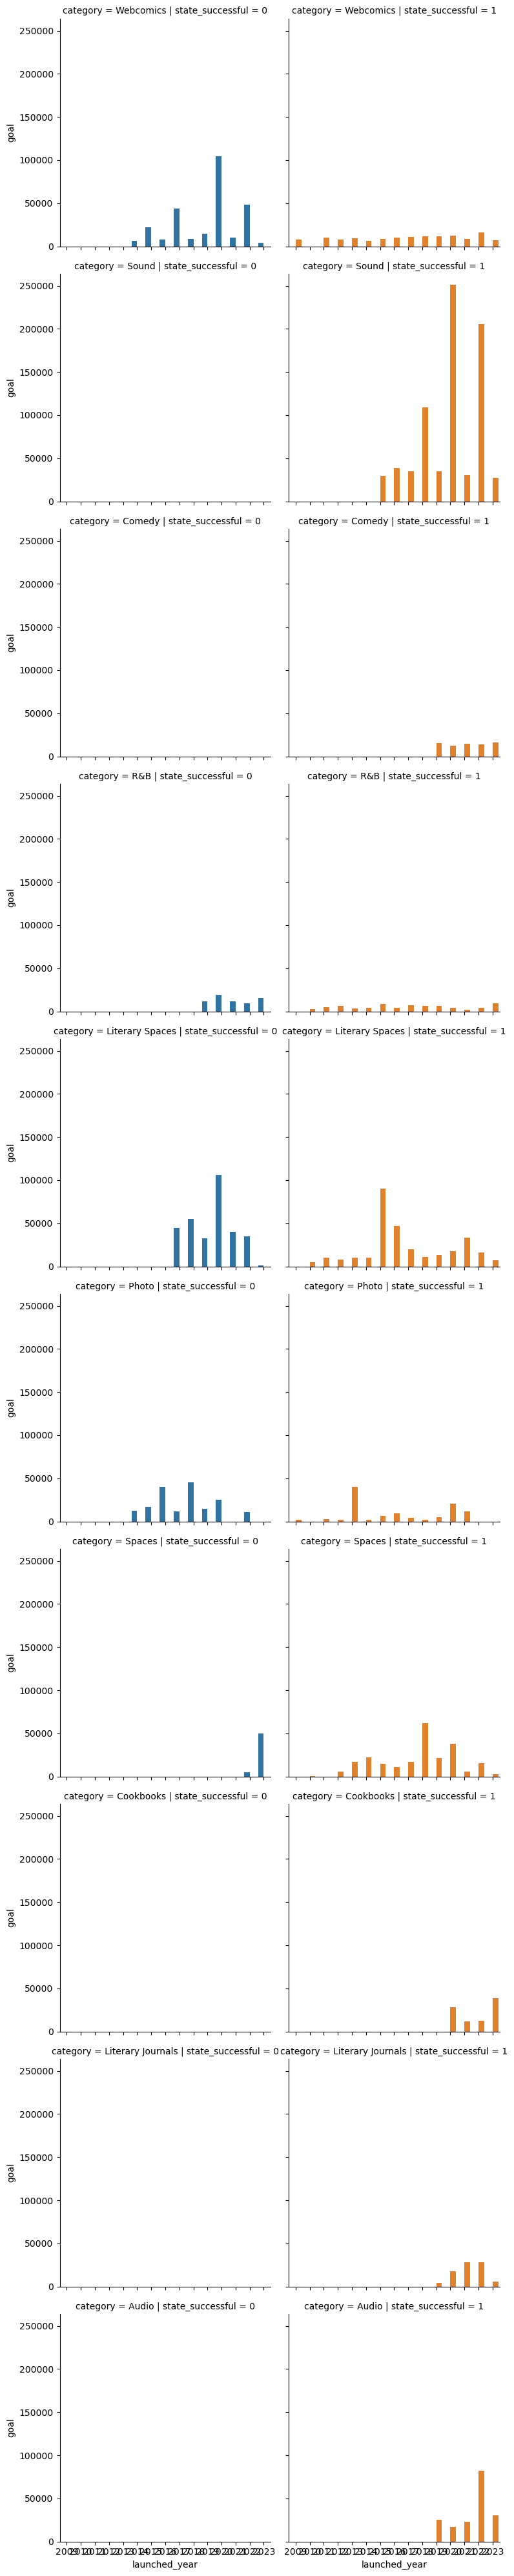

In [401]:
sns.catplot(x="launched_year",y="goal",hue="state_successful",row="category",\
            row_order=order,col="state_successful",kind="bar",errorbar=('ci',False),height=4,data=df_2);

### Correlation heat map

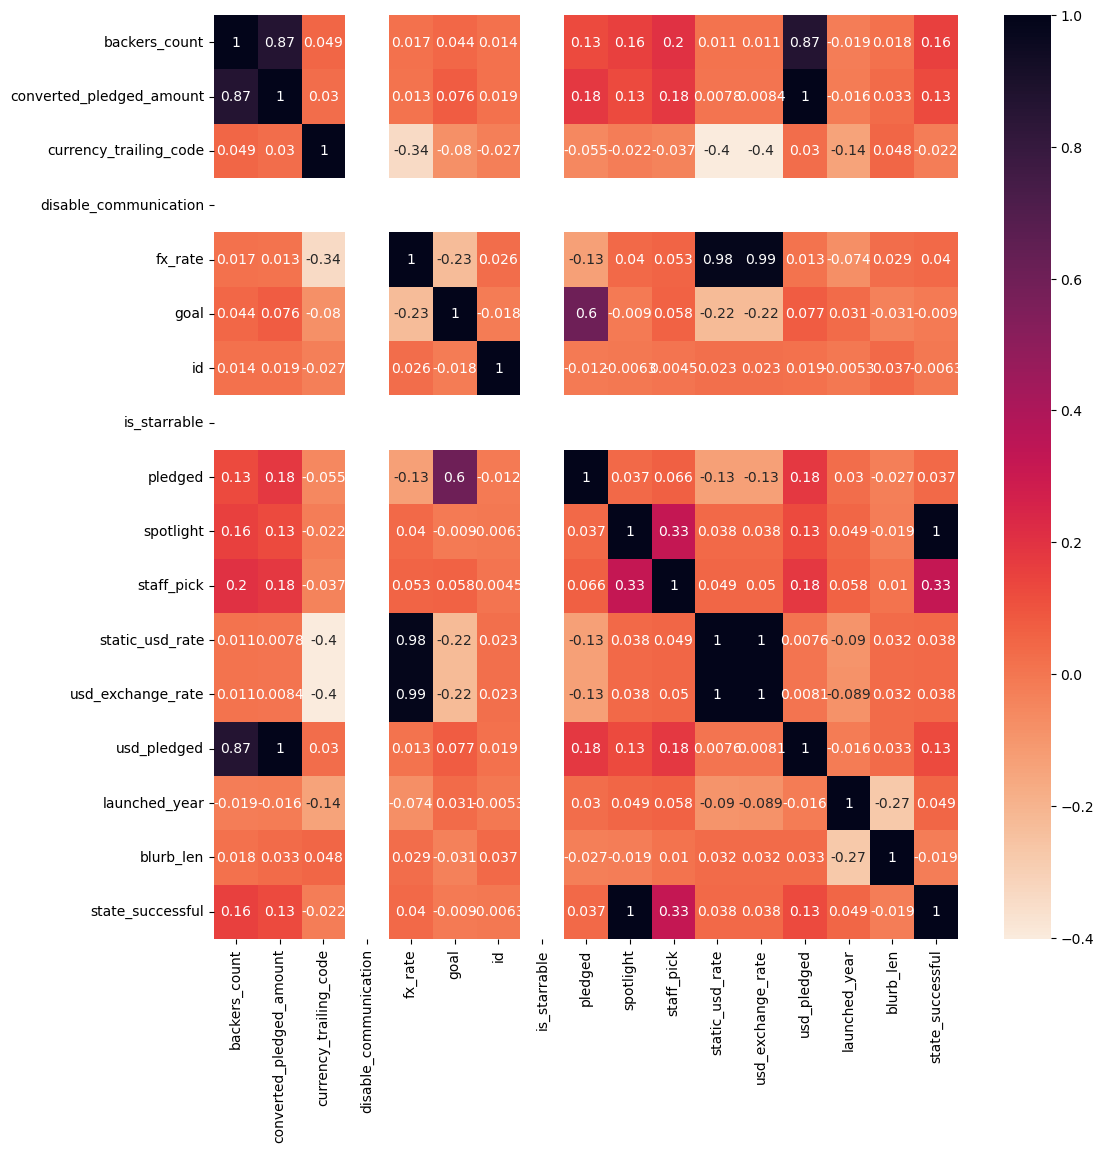

In [29]:
corrs=df_2.corr(numeric_only=True) # don't forget the () !!
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrs,ax=ax,cmap="rocket_r",annot=True); # annotate=True for (correlation) values on heatmap

In [26]:
print(pd.crosstab(df_2.staff_pick,df_2.state_successful))

state_successful    0     1
staff_pick                 
False             842  1488
True               34   864


## Preprocessing

### Feature selection

### Duplicates (if necessary)

### Missing values treatment

### Imbalanced variables